In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder


In [2]:
df_geral = pd.read_csv('df_geral.csv')

Mean Squared Error (MSE): 434963163402.8457
Mean Absolute Percentage Error (MAPE): 0.08798905475900541
R²: 0.869255970429307


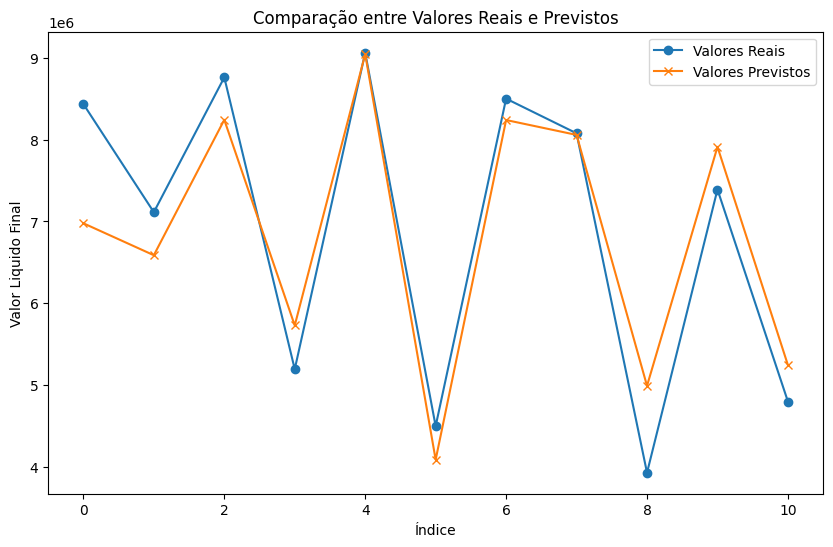

In [3]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Converter a coluna 'Data' para datetime
df_geral['Data'] = pd.to_datetime(df_geral['Data'])

# Criar novas features a partir da coluna 'Data'
df_geral['Ano'] = df_geral['Data'].dt.year
df_geral['Mes'] = df_geral['Data'].dt.month
df_geral['Dia_da_Semana'] = df_geral['Data'].dt.dayofweek  # Segunda-feira = 0, Domingo = 6

# Separar variáveis independentes (features) e dependente (target)
X = df_geral[['UEN', 'Veiculo', 'Origem', 'Setor', 'Cliente', 'Contratos', 'Ano', 'Mes', 'Dia_da_Semana']]
y = df_geral['Vl Liquido Final']

# Dividir os dados em conjunto de treino e teste (usando 80% para treino e 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar as features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir os hiperparâmetros ideais
best_params = {
    'n_estimators': 50,  
    'max_depth': 3,
    'learning_rate': 0.2,
    'subsample': 0.8,
    'colsample_bytree': 1.0,
    'alpha': 0.0,
    'lambda': 0.5,
    'random_state': 42
}


# Criar o modelo XGBoost com os hiperparâmetros definidos
model = xgb.XGBRegressor(**best_params)

# Treinar o modelo com os dados de treino
model.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred = model.predict(X_test_scaled)

# Calcular as métricas
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibir os resultados
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R²: {r2}")

# Plotar os valores reais vs valores previstos
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Valores Reais', marker='o')
plt.plot(y_pred, label='Valores Previstos', marker='x')
plt.title('Comparação entre Valores Reais e Previstos')
plt.xlabel('Índice')
plt.ylabel('Valor Liquido Final')
plt.legend()
plt.show()
